# Conjugate Priors

## Proof: The Posterior of a Beta-Binomial Model is Beta

### Setup:
- **Prior:** $p(\theta) \sim \text{Beta}(\alpha, \beta)$
- **Likelihood:** $\mathcal{L}(x|\theta) \sim \text{Binomial}(n, \theta)$

We want to show that the posterior \( p(\theta | x) \) is Beta-distributed.

### Step 1: Bayes' Theorem
$p(\theta | x) = \frac{p(x | \theta) p(\theta)}{p(x)}$

Where:
- $p(x | \theta)$ is the likelihood (Binomial),
- $p(\theta)$ is the prior (Beta).

### Step 2: Likelihood Function (Binomial)

$p(x | \theta) = \binom{n}{k} \theta^k (1 - \theta)^{n - k}$

Where \( k \) is the number of successes.

### Step 3: Prior Distribution (Beta)

$p(\theta) = \frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}$

Where $B(\alpha, \beta)$ is the Beta function.

### Step 4: Multiply Likelihood and Prior

$p(\theta | x) \propto \theta^k (1 - \theta)^{n - k} \times \theta^{\alpha - 1} (1 - \theta)^{\beta - 1}$

Combining the terms:

$p(\theta | x) \propto \theta^{k + \alpha - 1} (1 - \theta)^{n - k + \beta - 1}$

### Step 5: Recognize the Beta Form

$p(\theta | x) \sim \text{Beta}(k + \alpha, n - k + \beta)$

Thus, the posterior is a Beta distribution with updated parameters:

$\text{Beta}(\alpha + k, \beta + (n - k))$


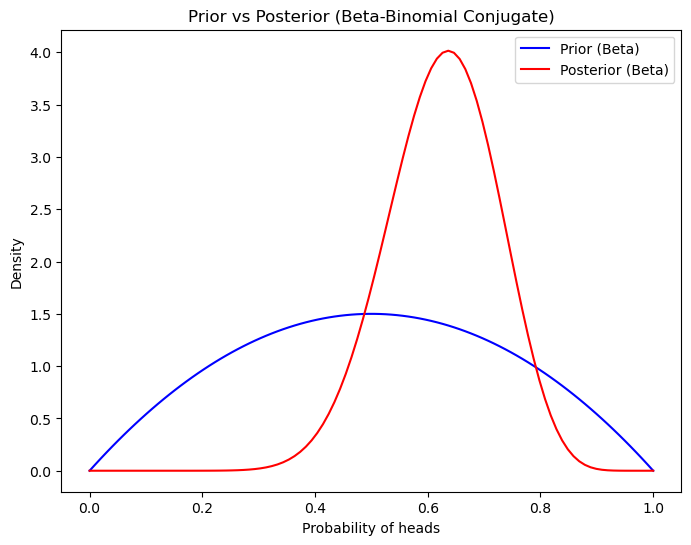

Posterior alpha: 15, Posterior beta: 9


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters of the prior Beta distribution (conjugate prior for Binomial likelihood)
alpha_prior = 2
beta_prior = 2

# Simulate Binomial data (coin flips: 1 = heads, 0 = tails)
np.random.seed(42)
data = np.random.binomial(1, 0.6, size=20)  # True probability of heads is 0.6
n_heads = np.sum(data)
n_tails = len(data) - n_heads

# Posterior parameters
alpha_post = alpha_prior + n_heads
beta_post = beta_prior + n_tails

# Plot prior and posterior
x = np.linspace(0, 1, 100)
prior_pdf = beta.pdf(x, alpha_prior, beta_prior)
posterior_pdf = beta.pdf(x, alpha_post, beta_post)

plt.figure(figsize=(8, 6), dpi = 100)
plt.plot(x, prior_pdf, label='Prior (Beta)', color='blue')
plt.plot(x, posterior_pdf, label='Posterior (Beta)', color='red')
plt.title('Prior vs Posterior (Beta-Binomial Conjugate)')
plt.xlabel('Probability of heads')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print updated posterior parameters
print(f"Posterior alpha: {alpha_post}, Posterior beta: {beta_post}")
